In [267]:
import pandas as pd
import numpy as np

In [259]:
year = 2021
locate = "강남구"


def population(year, locate):
    df = pd.read_csv(r"./data/주민등록인구_20230710130833.csv", header=0, index_col="동별(2)")
    df.drop(columns="동별(1)", inplace=True)
    df.drop(index="동별(2)", inplace=True)
    df.drop(index="소계", inplace=True)
    return df[str(year)][str(locate)]


def parkinglot(year, locate):
    df = pd.read_csv(r"./data/주택가+주차장_20230710095648.csv", header=0, index_col="자치구별(2)")
    df.drop(columns='자치구별(1)',inplace=True)
    return df[str(year)+'.5'][locate]

def house_price(year,locate):
    df=pd.read_csv(r'data/주택가격지수(매매)_20230710095430.csv',header=0)
    tmp=df.loc[df['시점'] == year].loc[df['자치구별(2)']==locate,'종합'].values
    return float(tmp)
def fire_count(year,locate):
    df=pd.read_csv(r'data/화재발생+현황_20230710145224.csv',index_col='동별(2)')
    df.drop(columns='동별(1)',inplace=True)
    tmp=df[str(year)][str(locate)]
    return tmp
def fire_price(year,locate):
    df=pd.read_csv(r'data/화재발생+현황_20230710145224.csv',index_col='동별(2)')
    df.drop(columns='동별(1)',inplace=True)
    tmp=df[str(year)+'.1'][str(locate)]
    return tmp



tmp=(fire_price(year,locate))
tmp

'1354949'

In [260]:
def business(year,locate,KindOfbusiness,KindOfData):
    df=pd.read_csv(r'data/사업체현황(산업대분류별_동별)(2017년+이후)_20230710103735.csv',header=None)

    # df=df.loc[df[4]="소계"]
    df.iloc[0][1]='년도'
    df.iloc[1][1]='합계'
    df.iloc[2][1]='업종'
    df.iloc[3][1]='통계종류'

    df=df.T
    df.drop(columns=[1,5],inplace=True)

    row = df.iloc[1]  # Select the row to use as column names
    df = df[2:]  # Remove the row from the DataFrame
    df = df.set_axis(row, axis='columns')  # Set the row as column names
    # tmp=df.head(20)
    tmp=(int(df.loc[df['년도']==str(year)].loc[df['업종']==KindOfbusiness].loc[df['동별(2)']=='소계'].loc[df['통계종류']==KindOfData,locate].values))
    return tmp

def business_ratio(year,locate,KindOfbusiness,KindOfData):
    return business(year,locate,KindOfbusiness,KindOfData)/business(year,locate,'소계',KindOfData)*100
    
(business_ratio(2021,'강남구','제조업','사업체수'))
# business(2017,'강남구','제조업','사업체수')

2.75164307725872

In [261]:
def metro(year,locate):
    import pandas as pd
    import csv

    # 추출할 역명 리스트
    # 추출할 인덱스 리스트
    station_list = [
        "압구정",
        "압구정로데오",
        "신사",
        "논현",
        "신논현",
        "강남",
        "양재",
        "매봉",
        "한티",
        "선릉",
        "학동",
        "언주",
        "매봉",
        "대치",
        "도곡",
        "개포동",
        "대청",
        "일원",
        "수서",
        "봉은사",
        "청담",
    ]
    station_list2 = ["온수", "개봉", "구로", "신도림"]
    input_file = "data/CARD_SUBWAY_MONTH_%d.csv" % year
    output_file = "data/CARD_SUBWAY_MONTH_%d_fixed.csv" % year

    print(input_file)
    with open(input_file, "r", encoding="euc-kr") as f_in, open(
        output_file, "w", newline="", encoding="euc-kr"
    ) as f_out:
        reader = csv.reader(f_in)
        writer = csv.writer(f_out)

        for row in reader:
            if len(row) > 7:
                # Split the row into two rows
                row1 = row[:7]
                row2 = row[7:]
                writer.writerow(row1)
                writer.writerow(row2)
            else:
                writer.writerow(row)
        # 데이터 불러오기
    subway = pd.read_csv(
        output_file, encoding="euc-kr", index_col=False
    )
    subway_df = subway.drop("등록일자", axis=1)
    subway_df.set_index("역명", inplace=True)
    subway_df = subway_df.drop("사용일자", axis=1)
    subway_sum = subway_df.groupby("역명").sum()

    # 역명을 포함한 열 추출
    filtered_data1 = subway_sum[subway_sum.index.isin(station_list)]

    # 필요한 열만 선택  
    extracted_data1 = filtered_data1[["승차총승객수", "하차총승객수"]]  
    # 역명을 포함한 열 추출
    filtered_data2 = subway_sum[subway_sum.index.isin(station_list2)]

    # 필요한 열만 선택
    extracted_data2 = filtered_data2[["승차총승객수", "하차총승객수"]]
    filtered_data1["지역구"] = "강남"

    # 필요한 열만 선택
    if locate=='강남구':
        extracted_data1 = filtered_data1[["지역구", "승차총승객수", "하차총승객수"]]
        extracted_data1.set_index("지역구",inplace=True)
        extracted_data_df1 = extracted_data1.groupby("지역구").sum()
        tmp=(int(extracted_data_df1.승차총승객수 + extracted_data_df1.하차총승객수.values))
        return tmp

    if locate=='구로구':
        filtered_data2["지역구"] = "구로"
        # 필요한 열만 선택
        extracted_data2 = filtered_data2[["지역구", "승차총승객수", "하차총승객수"]]
        extracted_data2.set_index("지역구", inplace=True)
        extracted_data_df2 = extracted_data2.groupby("지역구").sum()
        tmp=(int(extracted_data_df2.승차총승객수 + extracted_data_df2.하차총승객수.values))
        return tmp


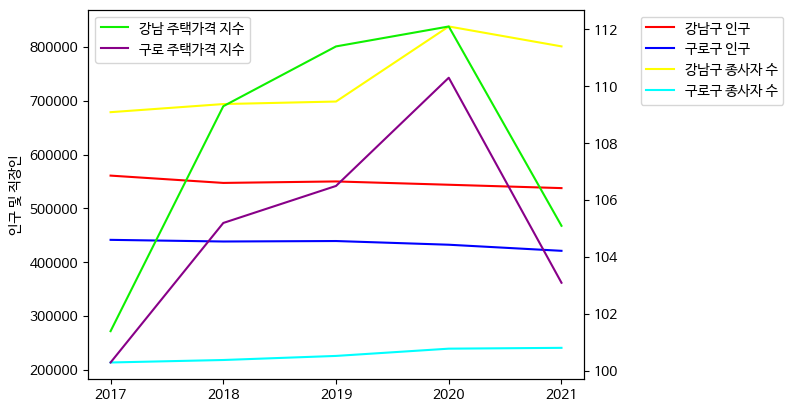

In [281]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rc('font', family='NanumBarunGothic')

yeardata = []
gangnampop = []
guro_pop = []
gangnam_business=[]
guro_business=[]
gangnam_jobs=[]
guro_jobs=[]
gangnam_house=[]
guro_house=[]

for year in range(2017, 2022):
    yeardata.append(year)
    gangnampop.append(int(population(year, '강남구')))
    guro_pop.append(int(population(year, '구로구')))
    gangnam_business.append(int(business(year,'강남구','소계','사업체수')))
    guro_business.append(int(business(year,'구로구','소계','사업체수')))
    gangnam_jobs.append(int(business(year,'강남구','소계','종사자수')))
    guro_jobs.append(int(business(year,'구로구','소계','종사자수')))
    gangnam_house.append(float(house_price(year,'강남구')))
    guro_house.append(float(house_price(year,'구로구')))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(yeardata, gangnampop, label='강남구 인구', color='#FF0000')
ax1.plot(yeardata, guro_pop, label='구로구 인구', color='#0000FF')

ax1.plot(yeardata, gangnam_jobs, label='강남구 종사자 수', color='#FFFF00')
ax1.plot(yeardata, guro_jobs, label='구로구 종사자 수', color='#00FFFF')

ax2.plot(yeardata, gangnam_house, label='강남 주택가격 지수',color='#0FF000')
ax2.plot(yeardata, guro_house, label='구로 주택가격 지수',color='#880088')

ax2.legend(loc='best')

ax1.set_ylabel('인구 및 직장인')
# ax2.set_ylabel('직장 수')

ax1.legend(loc='upper left', bbox_to_anchor=(1.1, 1))

plt.xticks(range(min(yeardata), max(yeardata)+1, 1))
plt.show()






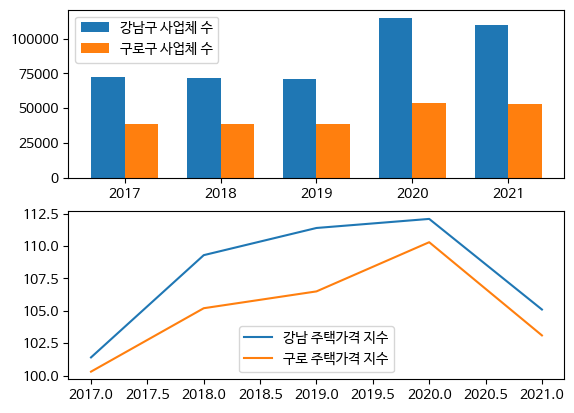

In [274]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=False)

bar_width = 0.35
x_pos = np.arange(len(yeardata))

ax1.bar(x_pos - bar_width/2, gangnam_business, bar_width, label='강남구 사업체 수')
ax1.bar(x_pos + bar_width/2, guro_business, bar_width, label='구로구 사업체 수')
ax2.plot(yeardata, gangnam_house, label='강남 주택가격 지수')
ax2.plot(yeardata, guro_house, label='구로 주택가격 지수')

ax1.set_xticks(x_pos)
ax1.set_xticklabels(yeardata)
ax1.legend(loc='best')
ax2.legend(loc='best')
plt.show()



In [287]:
poppark_gangnam=[]
poppark_guro=[]
for year in range(2017,2022,1):
    poppark_gangnam=float(float(population(year,'강남구'))//float(parkinglot(year,'강남구'))) 
    poppark_guro=float(float(population(year,'구로구'))//float(parkinglot(year,'구로구'))) 

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=False)

ax1.bar(x_pos - bar_width/2, gangnam_business, bar_width, label='강남구 사업체 수')
ax1.plot(yeardata,poppark_guro,label='주차장 당 인구수')
ax2.plot(yeardata, gangnam_house, label='강남 주택가격 지수')
ax2.plot(yeardata, guro_house, label='구로 주택가격 지수')

ax1.set_xticks(1)
ax1.set_xticklabels(yeardata)
ax1.legend(loc='best')
ax2.legend(loc='best')
plt.show()

5887.0
4464.0

5702.0
4371.0

5872.0
4415.0

5812.0
4244.0

5789.0
4141.0

